# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

# sns.reset_orig()
%load_ext autoreload
%autoreload 2

# rc("text", usetex=True)
# plt.grid(b=None)
# # plt.style.use('fivethirtyeight')
# sns.set(style="whitegrid")

## Beijing A

In [2]:
splits = 6

In [3]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST']:
    try:
        odf = pd.read_csv(f"../exp1/src/results/beijinga_scaled/{reg}/final.csv")        
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass
df = pd.concat(temp)
# df = df.append(interpols)
df = df[~(df['reg'] == "SVGP") & ~(df['lastKDays'].isin([100, 200]))]
# plt.figure(figsize=(12, 8))
df = df.rename(columns={"reg": "Method"})


In [4]:
df.head()

,is_val_error,Method,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
6568,False,Lasso,2,10,0,-1,29,7,45.028495,43.616394
6569,False,Lasso,2,10,0,-1,31,7,25.015194,24.804973
6570,False,Lasso,2,10,0,-1,33,7,10.556225,8.817482
6571,False,Lasso,2,10,0,-1,35,7,14.143677,12.072854
6572,False,Lasso,2,10,0,-1,37,7,26.068308,23.852236


In [5]:
temp = {
    "Method": [],
    "time_ix": [],
    "rmse": [],
    "mae": [],
    "kout": [],
}
for called_reg, reg in zip(['IDW', 'Kriging', 'Spatial GP'], ['idw', 'krig', 'spatial_gp']):
    df_rmse = pd.read_csv(f"../exp1/interpol_baselines/{reg}_rmse.csv").T
    df_mae = pd.read_csv(f"../exp1/interpol_baselines/{reg}_mae.csv").T
    for ix, row in enumerate(sorted(df_rmse.index)):
        if ix % 2 == 0:
            continue
        temp["Method"].extend([called_reg] * splits)
        temp["time_ix"].extend([ix] * splits)
        temp["rmse"].extend(list(df_rmse.loc[row][[i for i in range(splits)]]))
        temp["mae"].extend(list(df_mae.loc[row][[i for i in range(splits)]]))
        temp["kout"].extend(list(range(splits)))

values_total = len(temp["Method"])
temp["lastKDays"] = [1] * values_total
temp["is_val_error"] = [False] * values_total
temp["stepSize"] = [2] * values_total
temp["kin"] = [-1] * values_total
temp["kout"] = [-1] * values_total
temp["hy_ix"] = [-1] * values_total
for col in df.columns:
    temp[col]
interpols = pd.DataFrame(temp)[df.columns]
interpols.head()

,is_val_error,Method,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
0,False,IDW,2,1,-1,-1,1,-1,7.880223,7.321755
1,False,IDW,2,1,-1,-1,1,-1,11.665378,7.219419
2,False,IDW,2,1,-1,-1,1,-1,10.522260,9.401343
3,False,IDW,2,1,-1,-1,1,-1,8.760199,6.997543
4,False,IDW,2,1,-1,-1,1,-1,8.268696,6.032451


In [6]:
df = df.append(interpols)

In [7]:
df.tail()

,is_val_error,Method,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
3217,False,Spatial GP,2,1,-1,-1,357,-1,10.940519,7.763604
3218,False,Spatial GP,2,1,-1,-1,357,-1,16.353066,12.934362
3219,False,Spatial GP,2,1,-1,-1,357,-1,10.642272,9.431575
3220,False,Spatial GP,2,1,-1,-1,357,-1,16.441371,13.127388
3221,False,Spatial GP,2,1,-1,-1,357,-1,13.671508,12.020739


Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Validation on Beijing A.')

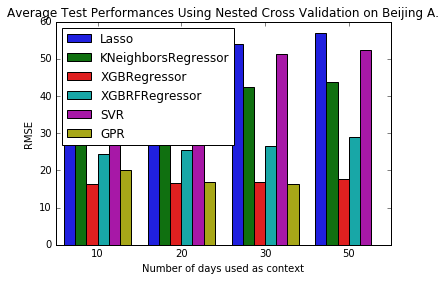

In [8]:
df = df[~(df['lastKDays'] == 1)]
sns.barplot(data=df, x="lastKDays", y="rmse", hue="Method", errwidth=0)
plt.ylabel("RMSE")
plt.xlabel("Number of days used as context")
plt.legend(loc="upper left")
plt.title(f"Average Test Performances Using Nested Cross Validation on Beijing A.")

In [9]:
from common_functions import latexify, format_axes, tableau20blind
latexify(12, 8)

In [10]:
emptydf = pd.DataFrame(columns=list(df["Method"].unique()) + ["lastKDays"])
emptydf

,Lasso,KNeighborsRegressor,XGBRegressor,XGBRFRegressor,SVR,GPR,lastKDays


In [11]:
for l, tempdf in df.groupby("lastKDays"):
    d = {}
    for method, tempdf1 in tempdf.groupby("Method"):
        d[method] = tempdf1["rmse"].mean()
#     break
    temp = [d.get(col, np.nan) for col in emptydf.columns[:-1]]
    emptydf.loc[emptydf.shape[0]] = temp + [l]

In [12]:
emptydf = emptydf.set_index("lastKDays")
emptydf

,Lasso,KNeighborsRegressor,XGBRegressor,XGBRFRegressor,SVR,GPR
lastKDays,,,,,,
10.0,46.514080,41.430106,16.451227,24.308331,52.093573,20.234332
20.0,50.932437,41.703029,16.510089,25.434430,47.626328,16.796107
30.0,53.955834,42.475588,16.867541,26.565905,51.156615,16.288170
50.0,56.925773,43.710305,17.813530,28.908094,52.445328,NaN


In [29]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
    'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14,
    'legend.framealpha': .6,
    "axes.labelsize": 12,
    
}
matplotlib.rcParams.update(params)

<Figure size 864x576 with 0 Axes>

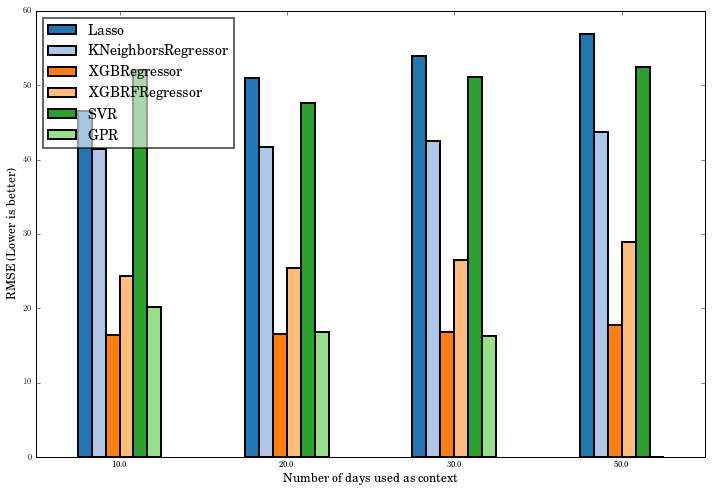

In [33]:
plt.figure(figsize=(12, 8))
emptydf.plot(kind="bar",rot=0)#, colors=tableau20blind)
plt.ylabel("RMSE (Lower is better)")
plt.xlabel("Number of days used as context")
plt.show()

In [16]:
df.groupby(["lastKDays", "Method"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays Method                                                       
10        GPR                         False       2.0  2.522655 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.494565 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.515385 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays Method                                                        
10        GPR                  194.850369   -1.0  20.234332  16.865000  
          KNeighborsRegressor  183.000000    9.0  41.430106  37.572285  
          Lasso                183.000000    7.0  46.514080  43.088327  
          SVR                  183.000000    5.0  52.093573  48.268716  
          XGBRFRegressor       193.000000   12.0  24.308331  20.369007  
          XGBRegressor         183.000000   12.0  16.451227  12.708142  
20        GPR                  193.873913   -1.0  16.796107  13.413240  
          KNeighborsRegressor  188.000000    9.0  41.703029  37.786218  
          Lasso                188.000000    7.0  50.932437  47.415423  
          SVR                  188.000000    5.0  47.626328  43.678932  
          XGBRFRegressor       193.000000   12.0  25.434430  21.488283  
          XGBRegressor         188.000000   12.0  16.510089  12.771814  
30        GPR                  192.419780   -1.0  16.288170  12.894913  
          KNeighborsRegressor  193.000000    9.0  42.475588  38.503464  
          Lasso                193.000000    7.0  53.955834  50.392806  
          SVR                  193.000000    5.0  51.156615  47.148515  
          XGBRFRegressor       193.000000   12.0  26.565905  22.508101  
          XGBRegressor         193.000000   12.0  16.867541  13.152681  
50        KNeighborsRegressor  203.000000    9.0  43.710305  39.622827  
          Lasso                203.000000    7.0  56.925773  53.146212  
          SVR                  203.000000    5.0  52.445328  48.303722  
          XGBRFRegressor       203.000000   12.0  28.908094  24.867795  
          XGBRegressor         203.000000   12.0  17.813530  14.030682

## Beijing B

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Validation on Beijing B.')

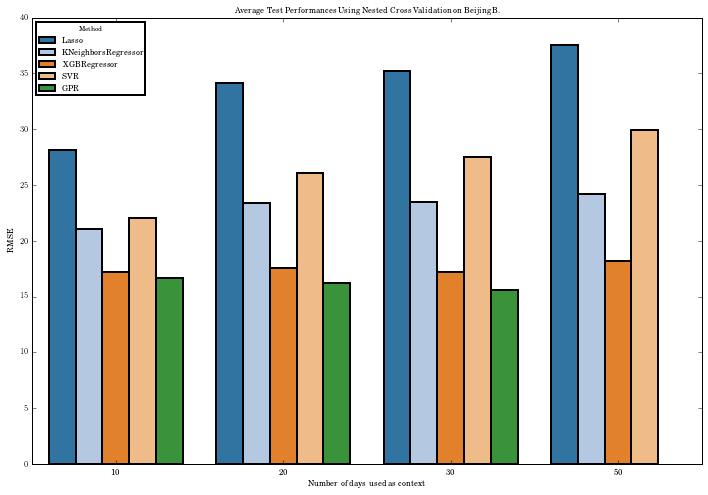

In [17]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', "gpFULL"]:
    try:
        odf = pd.read_csv(f"../exp1/src/results/beijingb_scaled/{reg}/final.csv")
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass
df = pd.concat(temp)
# df = df.append(interpols)
df = df[~(df['reg'] == "SVGP") & ~(df['lastKDays'].isin([100, 200]))]
plt.figure(figsize=(12, 8))
df = df.rename(columns={"reg": "Method"})
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="Method", errwidth=0)
plt.ylabel("RMSE")
plt.xlabel("Number of days used as context")
plt.title(f"Average Test Performances Using Nested Cross Validation on Beijing B.")

In [18]:
df.groupby(["lastKDays", "reg"]).mean()

KeyError: 'reg'